In [ ]:
import nltk
from nltk.corpus import stopwords, movie_reviews
from nltk.tokenize import word_tokenize
import random
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
nltk.download('stopwords')
nltk.download('movie_reviews')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\U765123\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\U765123\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\U765123\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# data processing

In [27]:
documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

random.shuffle(documents)
stop_words = set(stopwords.words('english'))


In [28]:
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return " ".join(tokens)

In [29]:
documents = [(preprocess_text(' '.join(doc)), category) for doc, category in documents]

In [30]:
# Separating the data and labels
texts, labels = zip(*documents)

# model training

In [31]:
# this is a bag of words cassifier
vectorizer = CountVectorizer(max_features=2000)
X = vectorizer.fit_transform(texts)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.25, random_state=42)


In [33]:
model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [34]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 85.60%


In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         neg       0.87      0.84      0.86       254
         pos       0.84      0.87      0.86       246

    accuracy                           0.86       500
   macro avg       0.86      0.86      0.86       500
weighted avg       0.86      0.86      0.86       500



# testing the model

In [37]:
# Function to predict sentiment
def predict_sentiment(text):
    preprocessed_text = preprocess_text(text)
    text_features = vectorizer.transform([preprocessed_text])
    sentiment = model.predict(text_features)
    return sentiment[0]

# Test the function with made up sample text
sample_text = "This movie was kind of okay but also not a big fan of it."
print(f"Sentiment: {predict_sentiment(sample_text)}")

Sentiment: neg


# improving the model

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Converting texts to a TF-IDF representation
vectorizer = TfidfVectorizer(max_features=2000)
X = vectorizer.fit_transform(texts)


In [39]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [40]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, labels, cv=5)
print(f"Cross-Validation Accuracy: {scores.mean() * 100:.2f}%")


Cross-Validation Accuracy: 83.85%


In [41]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(f"Best parameters: {grid_search.best_params_}")


Best parameters: {'alpha': 10}


In [42]:
# retraining the Multinomial Naive Bayes classifier with the best alpha
best_model = MultinomialNB(alpha=10)
best_model.fit(X_train, y_train)


MultinomialNB(alpha=10)

In [43]:

y_pred_best = best_model.predict(X_test)

# Evaluation of the accuracy
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Accuracy with Best Parameters: {accuracy_best * 100:.2f}%")

print(classification_report(y_test, y_pred_best))


Accuracy with Best Parameters: 85.20%
              precision    recall  f1-score   support

         neg       0.87      0.83      0.85       254
         pos       0.84      0.87      0.85       246

    accuracy                           0.85       500
   macro avg       0.85      0.85      0.85       500
weighted avg       0.85      0.85      0.85       500



In [44]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(best_model, X, labels, cv=5)
print(f"Cross-Validation Accuracy: {scores.mean() * 100:.2f}%")


Cross-Validation Accuracy: 81.10%


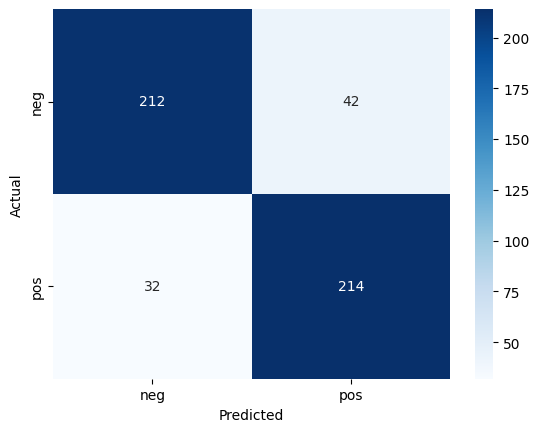

In [45]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['neg', 'pos'], yticklabels=['neg', 'pos'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()